# Task 2 Prediction using Unsupervised ML

## By Amit Nevarekar

## The Sparks Foundation

## Data Science and Analytics Intern

### Importing Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import sklearn.metrics as sm

### Loading Dataset

In [13]:
data=pd.read_csv("C:\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Finding the optimum number of clusters for k-means classification

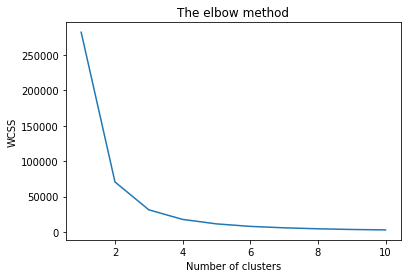

In [14]:
x=data.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### From the above graph, we have clearly seen optimum clusters is where the elbow occurs. This is when the within cluster sum of square (WCSS) doesn't decrease significantly 

#### From this we can choose number of clusters as # 3 #  

## Applying kmeans to the dataset / creating the kmeans classifier 

In [15]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

## Visualising the clusters - On the first two columns

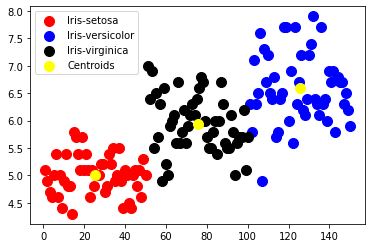

In [16]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label='Iris-versicolor')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='black', label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')

plt.legend()